In [5]:
import pandas as pd
from IPython.display import display
import math

df = pd.read_csv("C:/Users/bruno.santos/OneDrive - Moovi Comunicação e meios de pagamento EIRELI/Área de Trabalho/GameDataAnalyzer/game_data.csv", delimiter=";")

#Combinando as colunas de data em uma só
def combinar_datas(row):
    day = int(float(row['release_day'])) if not math.isnan(row['release_day']) else 1
    month = int(float(row['release_month'])) if not math.isnan(row['release_month']) else 1
    year = int(float(row['release_year'])) if not math.isnan(row['release_year']) else 2000
    return f"{day:02d}-{month:02d}-{year:04d}"

df['data_lancamento'] = df.apply(combinar_datas, axis=1)

#Excluindo as colunas que não será usadas
df = df.drop(['release_day', 'release_month', 'release_year'], axis=1)

#convertendo o tipo da coluna de data de obect para data
df['data_lancamento'] = pd.to_datetime(df['data_lancamento'], format='%d-%m-%Y', errors='coerce')

#exportando os dados limpos em csv
df.to_csv("C:/Users/bruno.santos/OneDrive - Moovi Comunicação e meios de pagamento EIRELI/Área de Trabalho/GameDataAnalyzer/game_data_limpo.csv")

display(df)
print(df.info())
print(df)



,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,data_lancamento
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012-09-12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012-09-12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012-09-12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012-09-11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012-09-11
...,...,...,...,...,...,...,...,...,...
18620,18620,Good,Tokyo Mirage Sessions #FE,/games/fire-emblem-x-shin-megami-tensei/wii-u-...,Wii U,7.6,RPG,N,2016-06-29
18621,18621,Amazing,LEGO Star Wars: The Force Awakens,/games/lego-star-wars-the-force-awakens/ps4-20...,PlayStation 4,9.0,"Action, Adventure",Y,2016-06-29
18622,18622,Mediocre,Star Ocean: Integrity and Faithlessness,/games/star-ocean-5/ps4-20035681,PlayStation 4,5.8,RPG,N,2016-06-28
18623,18623,Masterpiece,Inside,/games/inside-playdead/xbox-one-121435,Xbox One,10.0,Adventure,Y,2016-06-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18625 entries, 0 to 18624
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       18625 non-null  int64         
 1   score_phrase     18625 non-null  object        
 2   title            18625 non-null  object        
 3   url              18624 non-null  object        
 4   platform         18624 non-null  object        
 5   score            18624 non-null  float64       
 6   genre            18588 non-null  object        
 7   editors_choice   18624 non-null  object        
 8   data_lancamento  18625 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 1.3+ MB
None
       Unnamed: 0 score_phrase  \
0               0      Amazing   
1               1      Amazing   
2               2        Great   
3               3        Great   
4               4        Great   
...           ...  

**Qual é a distribuição de jogos por gênero.**

C:\Users\bruno.santos\AppData\Local\Temp\ipykernel_576\3496384105.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_top_genres, y='genre', palette='viridis')


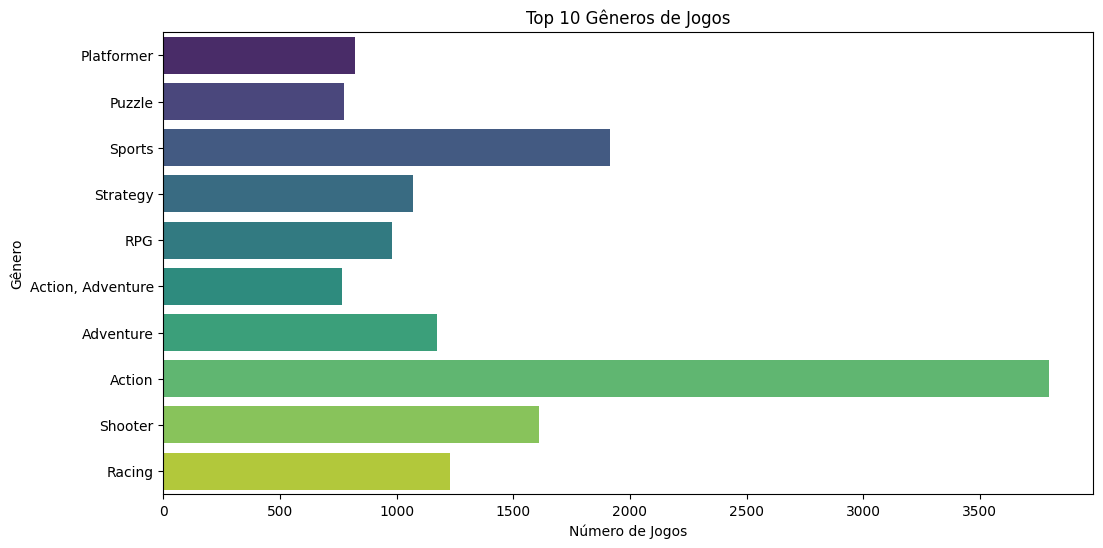

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/bruno.santos/OneDrive - Moovi Comunicação e meios de pagamento EIRELI/Área de Trabalho/GameDataAnalyzer/game_data_limpo.csv", delimiter=",")

# Define o numeor de generos que vai apresentar
top_n_genres = 10

# Seleciona os N gêneros mais comuns
top_genres = df['genre'].value_counts().nlargest(top_n_genres).index

# Cria um novo DataFrame com apenas os N gêneros mais comuns
df_top_genres = df[df['genre'].isin(top_genres)]

# Substitua os outros gêneros por 'Outros'
df_top_genres.loc[~df_top_genres['genre'].isin(top_genres), 'genre'] = 'Outros'

# Criar um gráfico de barras para a distribuição de jogos por gênero
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_genres, y='genre', palette='viridis')
plt.title(f'Top {top_n_genres} Gêneros de Jogos')
plt.xlabel('Número de Jogos')
plt.ylabel('Gênero')
plt.show()



**Como as pontuações dos jogos variam ao longo do tempo?**

C:\Users\bruno.santos\AppData\Local\Temp\ipykernel_576\468507067.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='data_lancamento', y='score', ci=None)


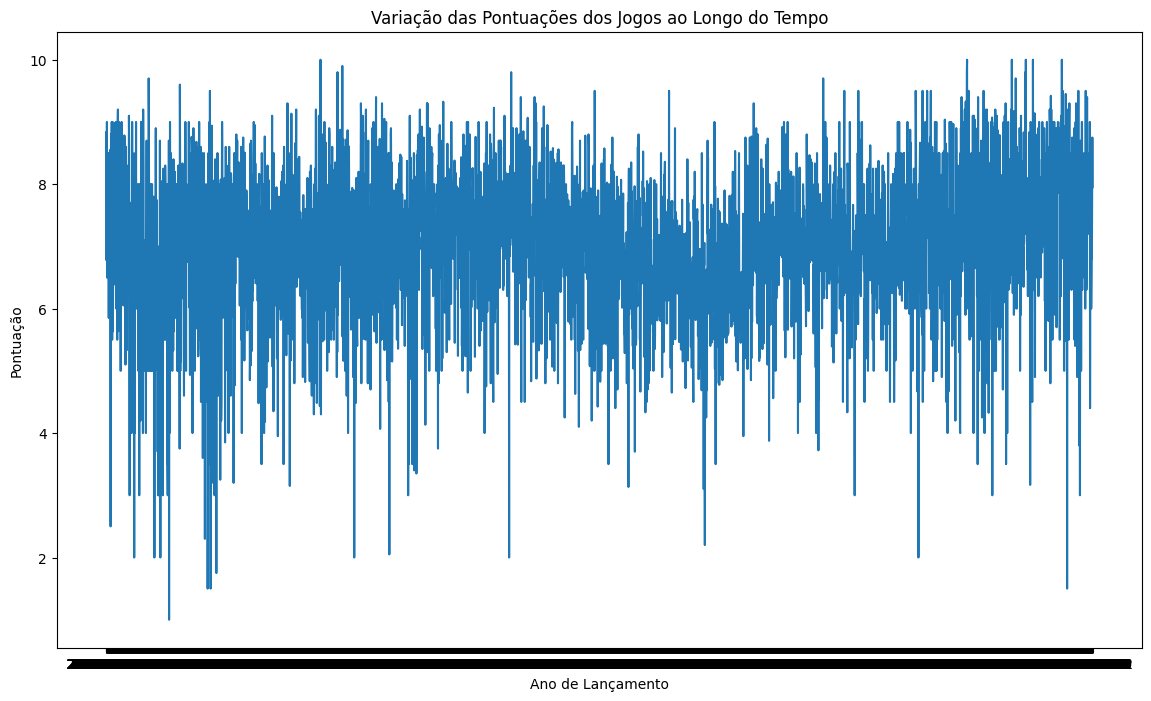

In [7]:
import matplotlib.pyplot as plt  # Importa pyplot diretamente
import seaborn as sns
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='data_lancamento', y='score', ci=None)
plt.title('Variação das Pontuações dos Jogos ao Longo do Tempo')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Pontuação')
plt.show()



**Como as pontuações variam com o tempo de lançamento?**

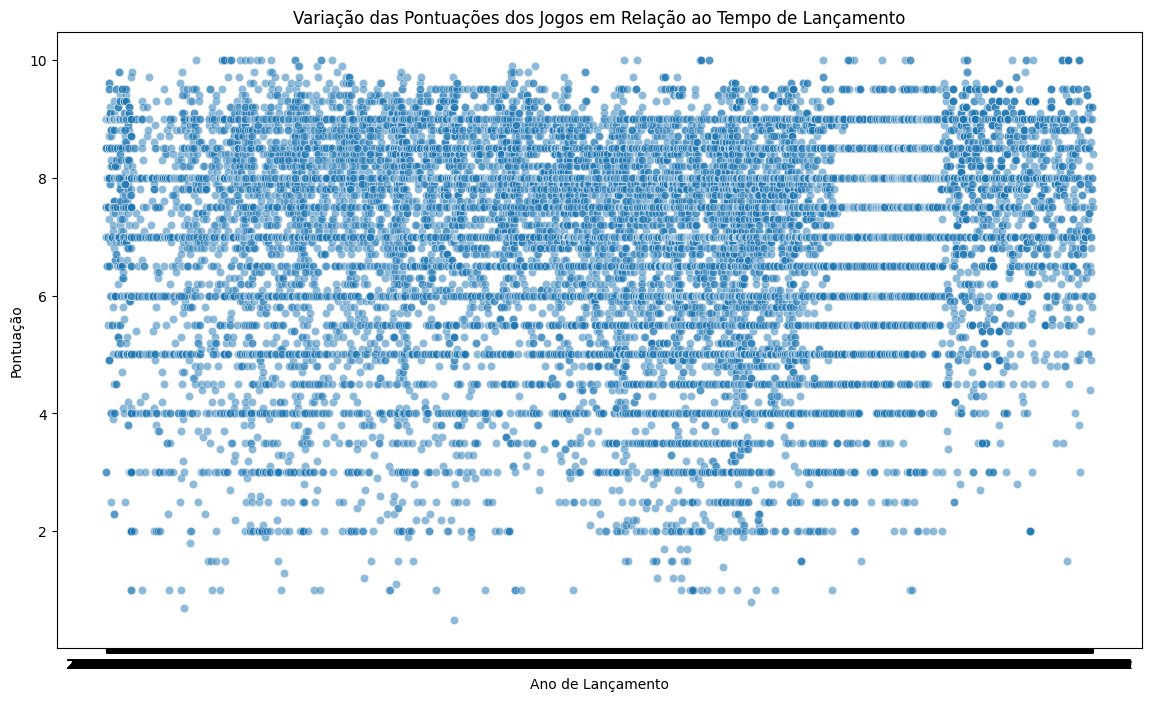

In [8]:
# Cria um gráfico de dispersão para as pontuações dos jogos em relação ao tempo de lançamento
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='data_lancamento', y='score', alpha=0.5)
plt.title('Variação das Pontuações dos Jogos em Relação ao Tempo de Lançamento')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Pontuação')
plt.show()

In [9]:
# Salvando o DataFrame transformado de volta para um arquivo CSV
df.to_csv("C:/Users/bruno.santos/OneDrive - Moovi Comunicação e meios de pagamento EIRELI/Área de Trabalho/GameDataAnalyzer/processed_data.csv", index=False)
